# Minor Project 6 - K Means Clustering


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [2]:
df = pd.read_csv("/content/Online_Retail.csv")

## Initial Analysis

In [3]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  01/12/10 08:26       2.55     17850.0  United Kingdom  
1  01/12/10 08:26       3.39     17850.0  United Kingdom  
2  01/12/10 08:26       2.75     17850.0  United Kingdom  
3  01/12/10 08:26       3.39     17850.0  United Kingdom  
4  01/12/10 08:26       3.39     17850.0  United Kingdom  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
print(df.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


## Check for Duplicates

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  535187 non-null  object 
 3   Quantity     536641 non-null  int64  
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB
None



## Outlier Detection and Correction






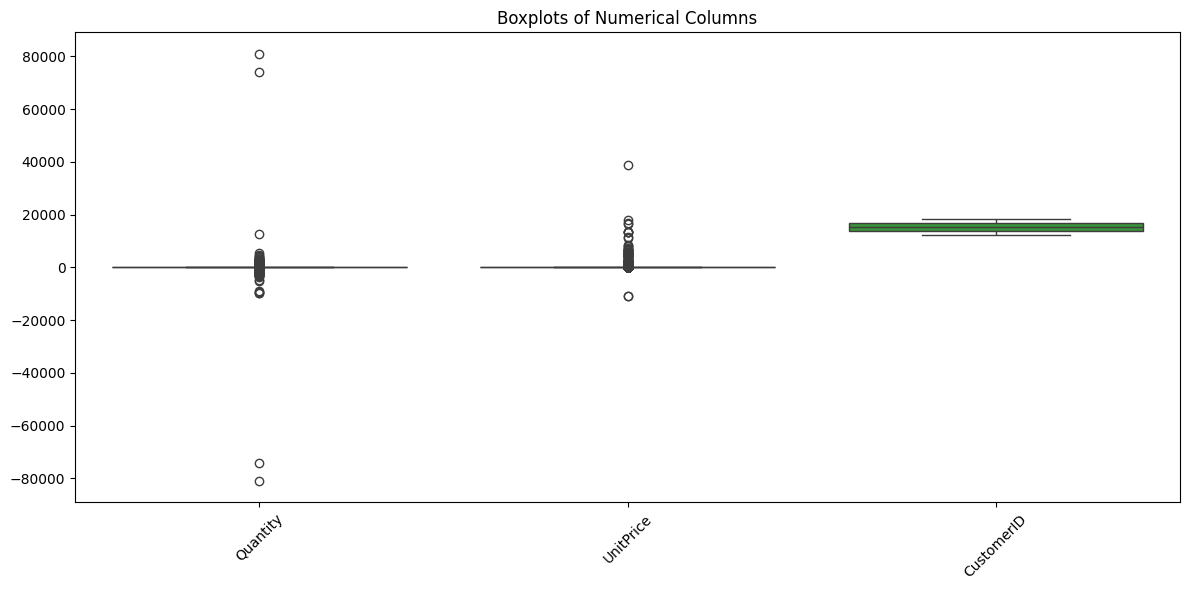

In [8]:
num_cols = df.select_dtypes(include = ["float64", "int64"]).columns.tolist()

plt.figure(figsize = (12, 6))
sns.boxplot(data = df[num_cols])
plt.xticks(rotation = 45)
plt.title("Boxplots of Numerical Columns")
plt.tight_layout()
plt.show()

In [9]:
def outlier_correction(df, col, show_plot = True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

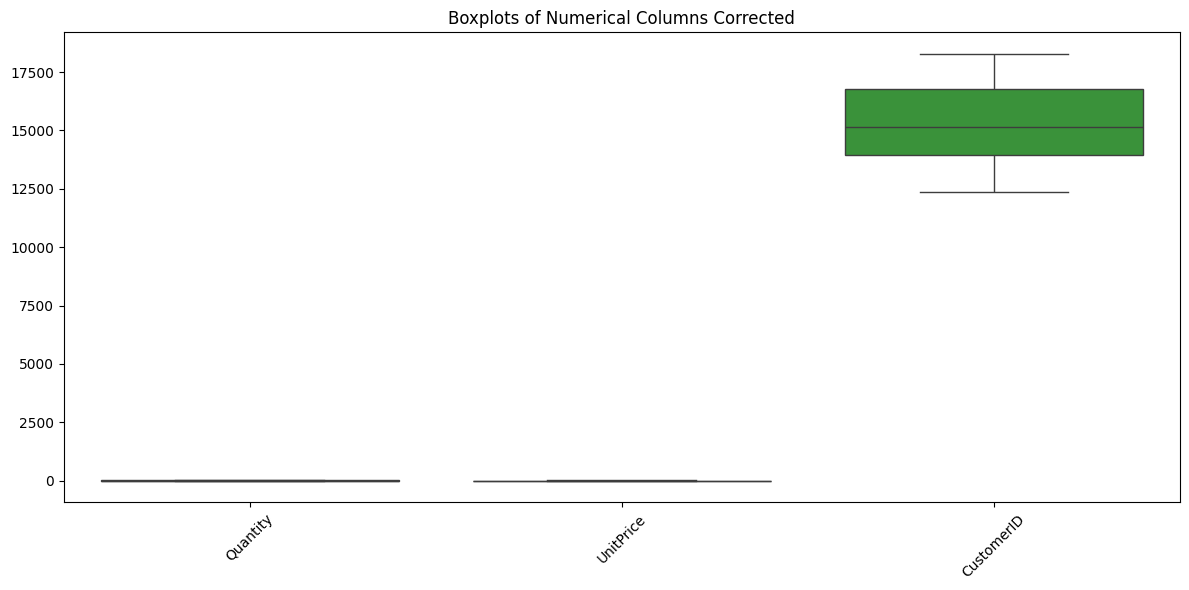

In [10]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot = False)
plt.figure(figsize = (12, 6))
sns.boxplot(data = df[num_cols])
plt.xticks(rotation = 45)
plt.title("Boxplots of Numerical Columns Corrected")
plt.tight_layout()
plt.show()

## Handling Missing Values

In [11]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace = True)
        else:
            df[col].fillna(df[col].mode()[0], inplace = True)


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    536641 non-null  object 
 1   StockCode    536641 non-null  object 
 2   Description  536641 non-null  object 
 3   Quantity     536641 non-null  float64
 4   InvoiceDate  536641 non-null  object 
 5   UnitPrice    536641 non-null  float64
 6   CustomerID   536641 non-null  float64
 7   Country      536641 non-null  object 
dtypes: float64(3), object(5)
memory usage: 36.8+ MB
None


## Bivariate Analysis

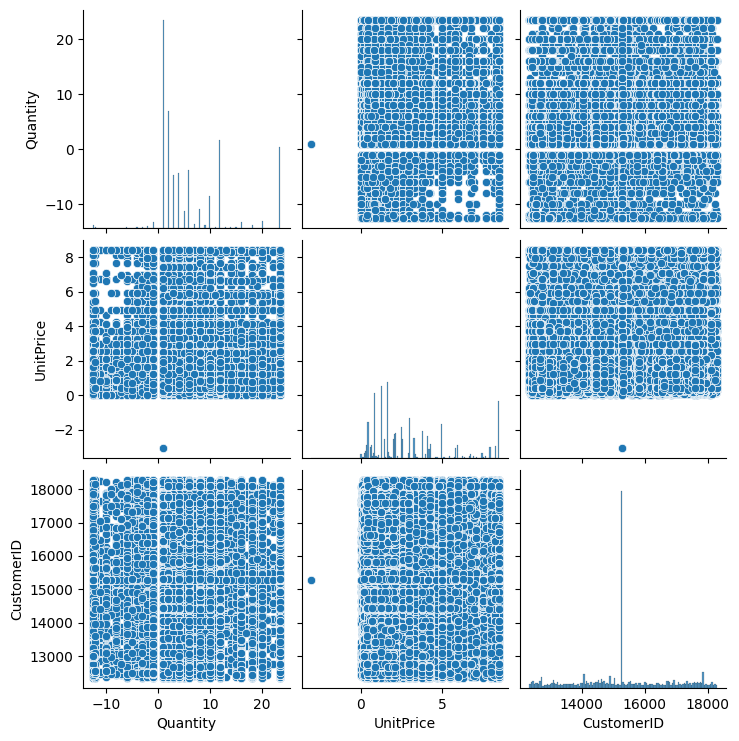

In [13]:
sns.pairplot(df[num_cols], diag_kind = 'hist')
plt.show()


## Correlation and Heatmap

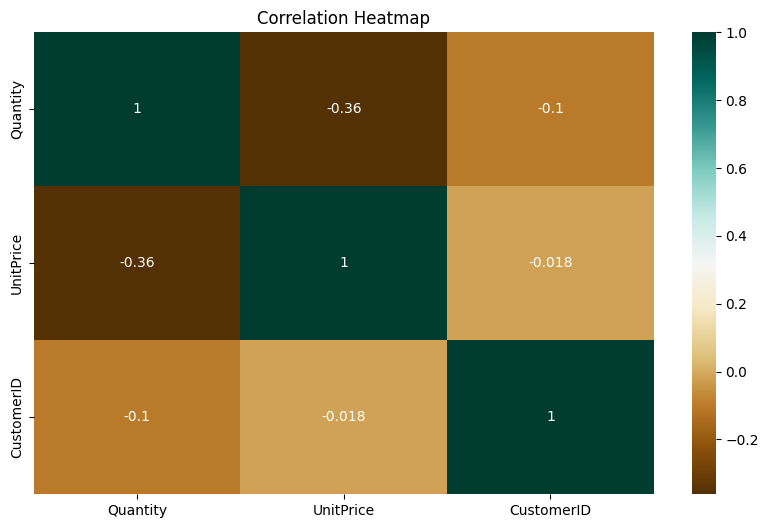

In [14]:
plt.figure(figsize = (10,6))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = "BrBG")
plt.title("Correlation Heatmap")
plt.show()

## Encoding

In [15]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include = ['object', ]).columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

## Normalisation and Scaling

In [16]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

   InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0          0       3536         3918 -0.072369          606  -0.170972   
1          0       2794         3926 -0.072369          606   0.177653   
2          0       3044          913  0.201160          606  -0.087966   
3          0       2985         1910 -0.072369          606   0.177653   
4          0       2984         2911 -0.072369          606   0.177653   

   CustomerID  Country  
0    1.732479       36  
1    1.732479       36  
2    1.732479       36  
3    1.732479       36  
4    1.732479       36  


## Checking Inertia and Solhouette Score

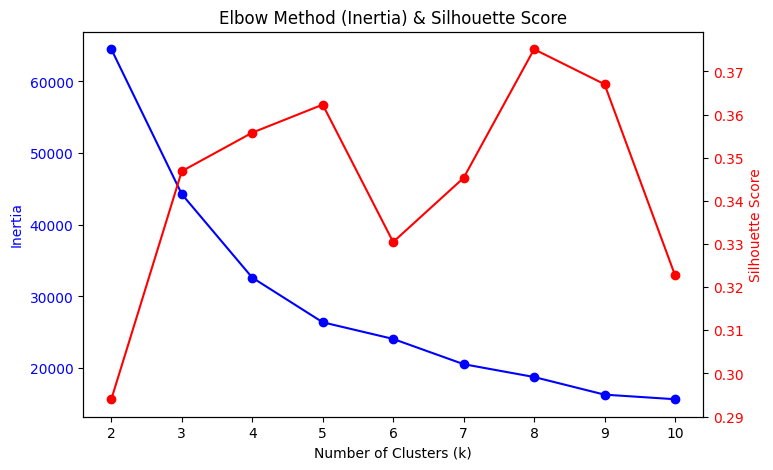

In [18]:
X = df[num_cols]
sample_idx = np.random.choice(X.shape[0], 30000, replace=False)
X_sample = X.iloc[sample_idx]

inertia = []
silhouette = []
K = range(2, 11)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k, random_state = 42, batch_size = 1000, n_init = 5, max_iter = 100)
    kmeans.fit(X_sample)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_sample, kmeans.labels_)
    silhouette.append(score)

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.plot(K, inertia, 'bo-', label = 'Inertia')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia', color = 'b')
ax1.tick_params(axis = 'y', labelcolor = 'b')

ax2 = ax1.twinx()
ax2.plot(K, silhouette, 'ro-', label = 'Silhouette Score')
ax2.set_ylabel('Silhouette Score', color = 'r')
ax2.tick_params(axis = 'y', labelcolor = 'r')

plt.title('Elbow Method (Inertia) & Silhouette Score')
plt.show()

## K Means

In [19]:
kmeans = KMeans(n_clusters = 4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


In [20]:
df['Cluster'].value_counts()
centroids = kmeans.cluster_centers_
print(pd.DataFrame(centroids, columns = X.columns))


   Quantity  UnitPrice  CustomerID
0 -0.372596  -0.333182    0.600617
1  2.203536  -0.686567   -0.141592
2 -0.574644   1.800374   -0.044340
3 -0.003333  -0.378273   -1.055339


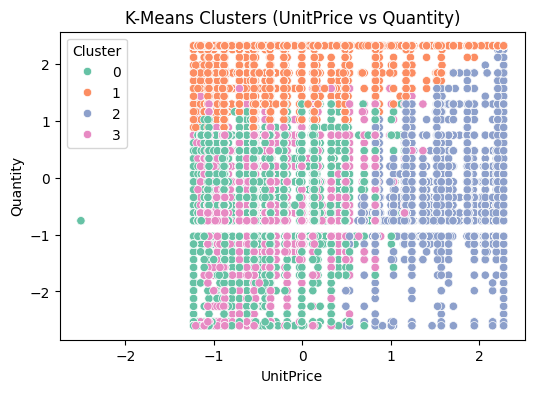

In [21]:
x_col = 'UnitPrice'
y_col = 'Quantity'

plt.figure(figsize=(6,4))
sns.scatterplot(x=df[x_col], y=df[y_col], hue=df['Cluster'], palette='Set2')
plt.title(f'K-Means Clusters ({x_col} vs {y_col})')
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()


Cluster-wise Mean Feature Values:
             InvoiceNo    StockCode  Description  Quantity   InvoiceDate  \
Cluster                                                                   
0        11538.826185  1633.855451  2127.822837 -0.373464  11644.503513   
1        11590.179807  1612.108340  2186.358169  2.203693  11684.476565   
2        11173.282440  1758.038075  2135.244949 -0.574593  11700.181647   
3        12209.364492  1622.395178  2125.046970 -0.002890  11662.082176   

         UnitPrice  CustomerID    Country  
Cluster                                    
0        -0.332640    0.602201  35.854381  
1        -0.686607   -0.141953  32.692724  
2         1.800405   -0.044894  34.440243  
3        -0.379173   -1.051889  31.814805  


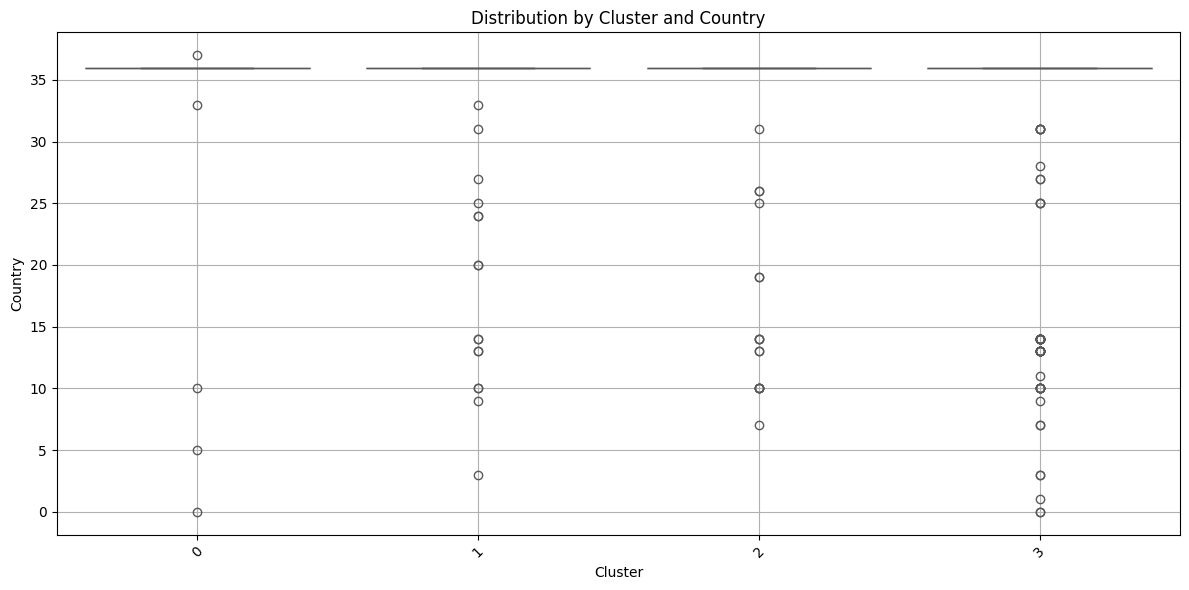

In [22]:
df_sample = df.sample(n = 1000, random_state = 42)

cluster_analysis = df.groupby('Cluster').mean()
print("Cluster-wise Mean Feature Values:\n", cluster_analysis)

plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Cluster', y = 'Country', data = df_sample, palette = 'Set2')
plt.title('Distribution by Cluster and Country')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()